In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os


# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
import os
os.chdir(r"C:\Users\hp\Desktop\customer_churn_prediction")

# Load cleaned data
df = pd.read_csv('data/processed/cleaned_churn_data.csv')

# Convert Churn to binary for analysis
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [3]:
# Map churn values to labels
df['Churn_Label'] = df['Churn'].map({0: 'Loyal', 1: 'Churned'})

import plotly.express as px

# Create pie chart
fig = px.pie(
    df,
    names='Churn_Label',
    title='Customer Churn Rate',
    color='Churn_Label',
    color_discrete_map={'Loyal': 'lightblue', 'Churned': 'darkred'},
    hole=0.4
)
fig.update_traces(textinfo='percent+label')
fig.show()


In [4]:
fig.write_image("reports/images/churn_pie.png", width=800, height=500)

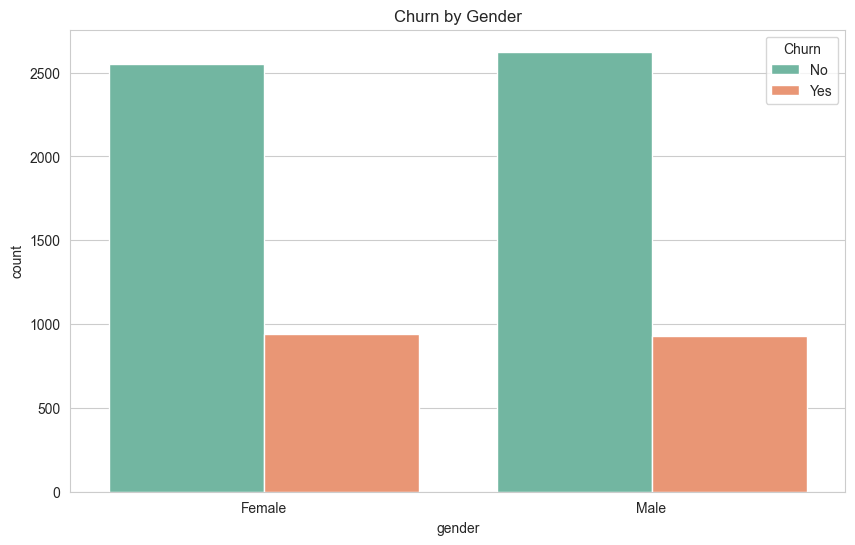

In [5]:
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn by Gender')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.savefig('reports/images/churn_gender.png', bbox_inches='tight')
plt.show()

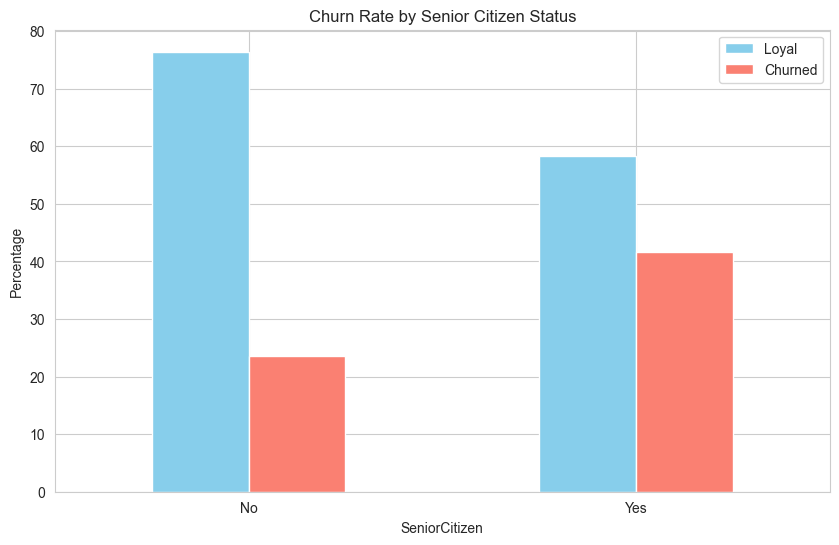

In [6]:
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
senior_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(['Loyal', 'Churned'])
plt.savefig('reports/images/churn_senior.png', bbox_inches='tight')
plt.show()

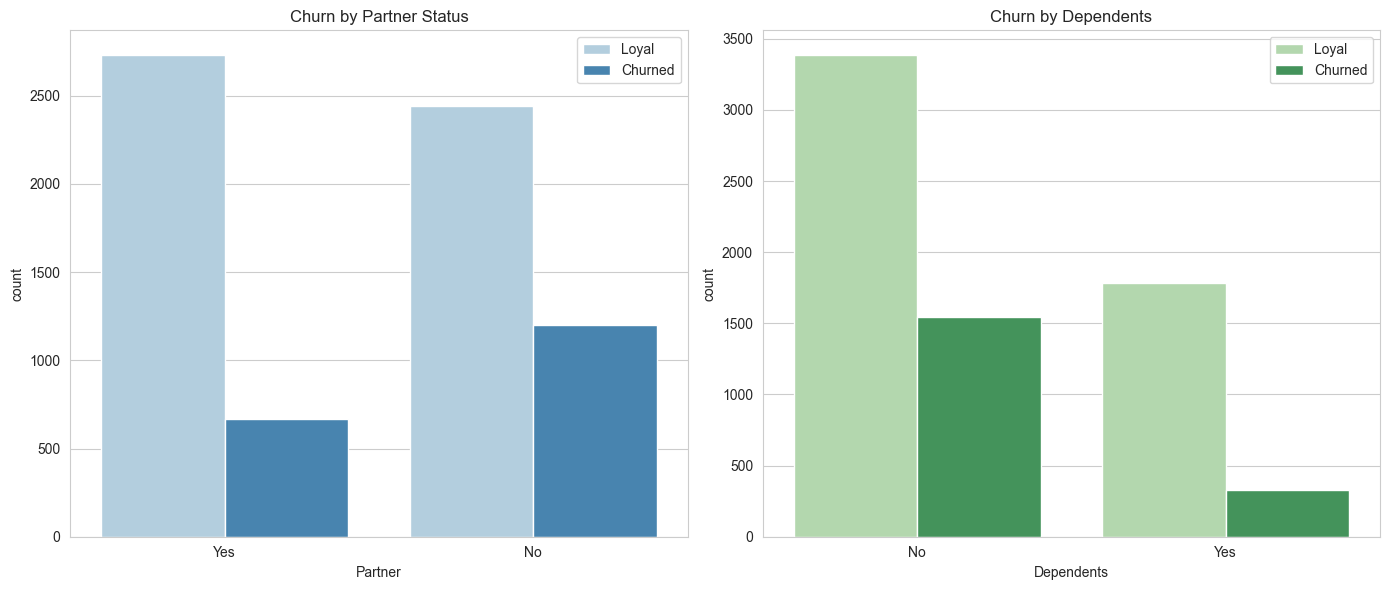

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0], palette='Blues')
ax[0].set_title('Churn by Partner Status')
ax[0].legend(['Loyal', 'Churned'])

sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax[1], palette='Greens')
ax[1].set_title('Churn by Dependents')
ax[1].legend(['Loyal', 'Churned'])

plt.tight_layout()
plt.savefig('reports/images/churn_family.png', bbox_inches='tight')
plt.show()

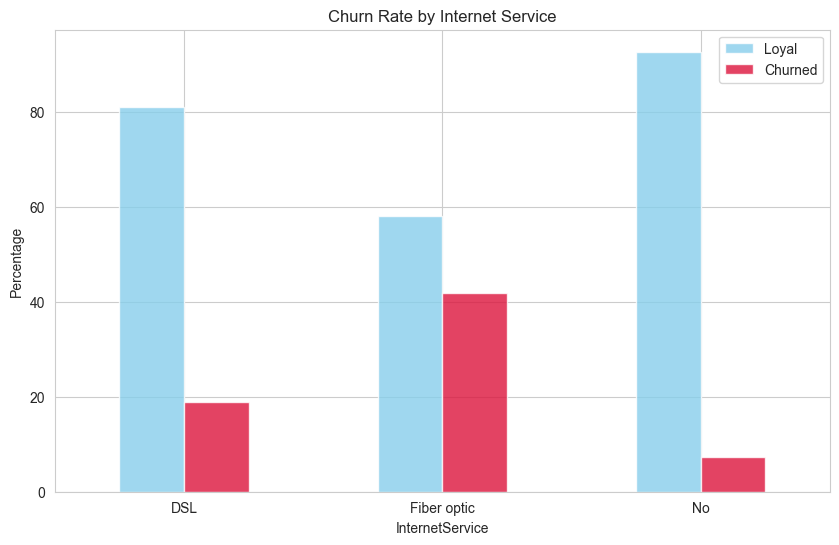

In [8]:
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', color=['skyblue', 'crimson'], alpha=0.8)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Loyal', 'Churned'])
plt.savefig('reports/images/churn_internet.png', bbox_inches='tight')
plt.show()

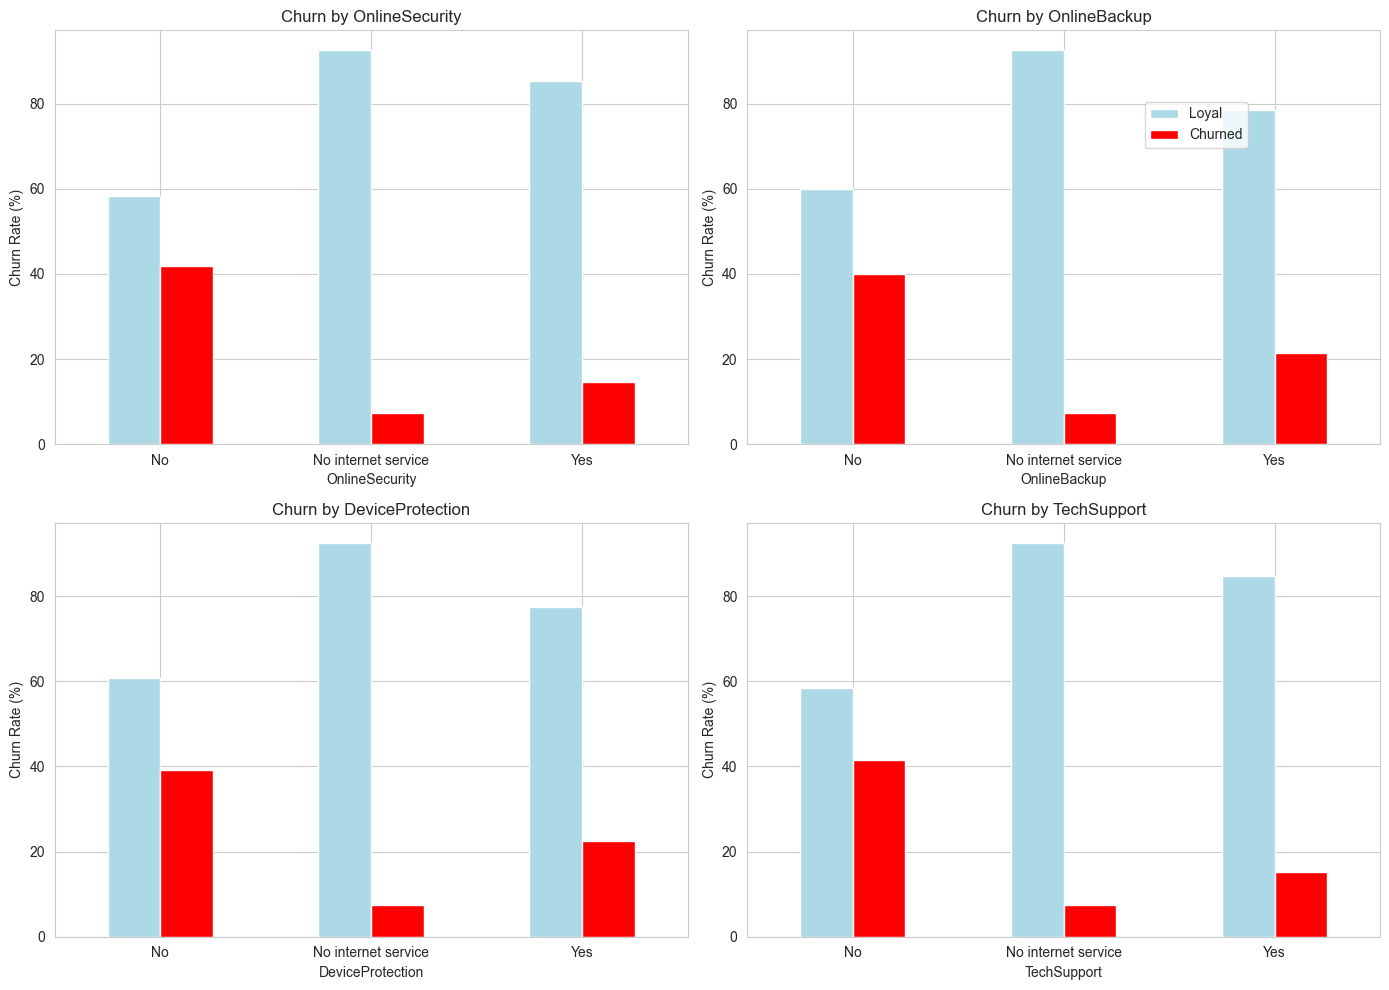

In [10]:
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, service in enumerate(services):
    temp = pd.crosstab(df[service], df['Churn'], normalize='index') * 100
    temp.plot(kind='bar', ax=axes[i], color=['lightblue', 'red'], legend=False)
    axes[i].set_title(f'Churn by {service}')
    axes[i].set_ylabel('Churn Rate (%)')
    
    # Get the actual labels from the data instead of hardcoding
    actual_labels = [str(label) for label in temp.index]
    axes[i].set_xticklabels(actual_labels, rotation=0)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Loyal', 'Churned'], loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.tight_layout()
plt.savefig('reports/images/churn_addons.png', bbox_inches='tight')
plt.show()

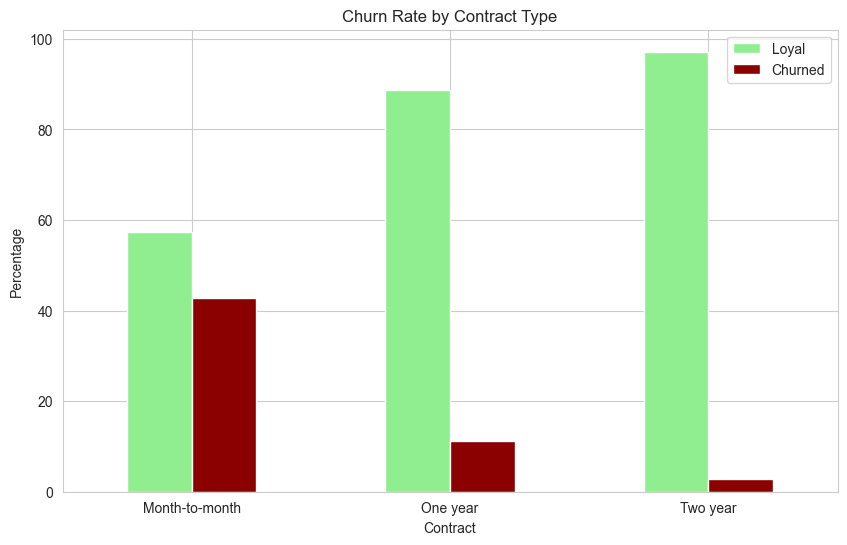

In [11]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', color=['lightgreen', 'darkred'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Loyal', 'Churned'])
plt.savefig('reports/images/churn_contract.png', bbox_inches='tight')
plt.show()

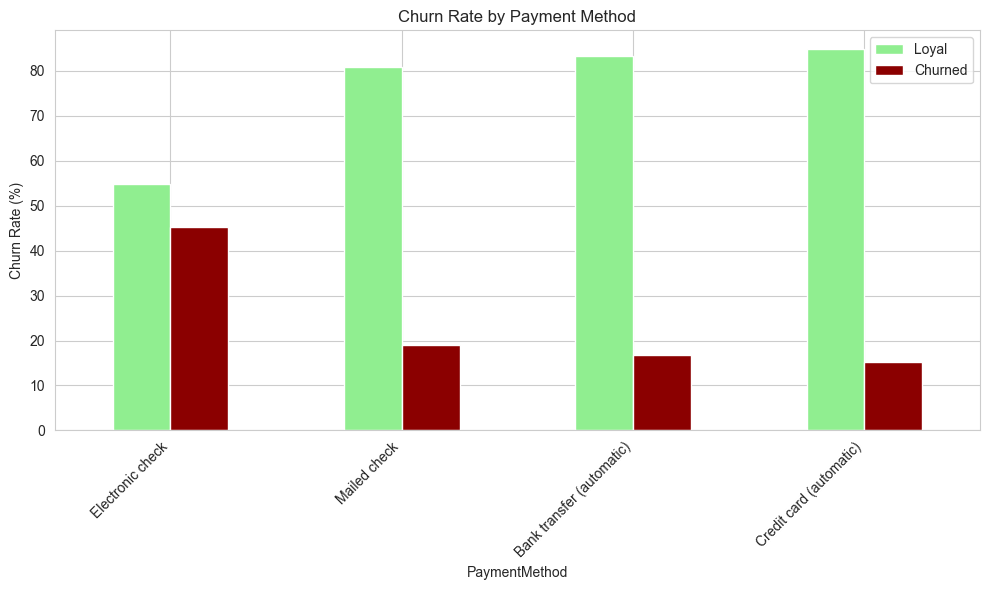

In [15]:
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.sort_values(by=1, ascending=False).plot(kind='bar', color=['lightgreen', 'darkred'])
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Loyal', 'Churned'])
plt.tight_layout()
plt.savefig('reports/images/churn_payment.png', bbox_inches='tight')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3880\4106388226.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




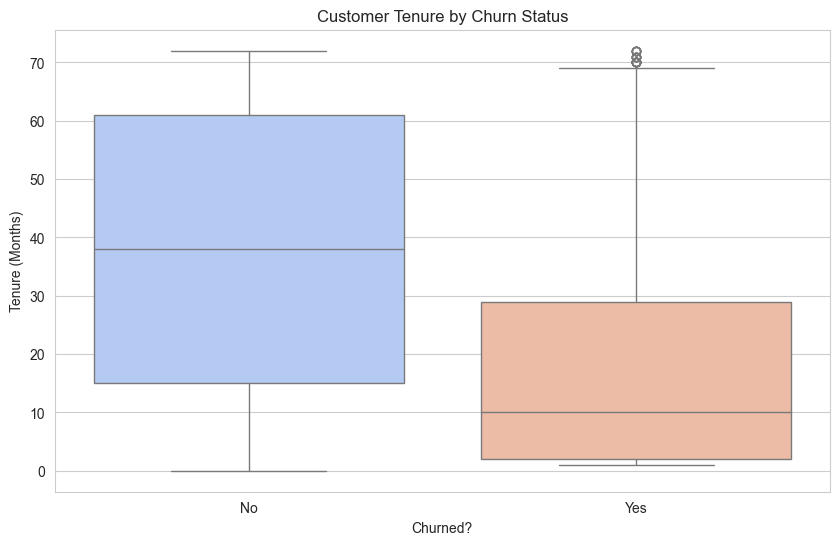

In [16]:
sns.boxplot(data=df, x='Churn', y='tenure', palette='coolwarm')
plt.title('Customer Tenure by Churn Status')
plt.xlabel('Churned?')
plt.ylabel('Tenure (Months)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('reports/images/churn_tenure.png', bbox_inches='tight')
plt.show()

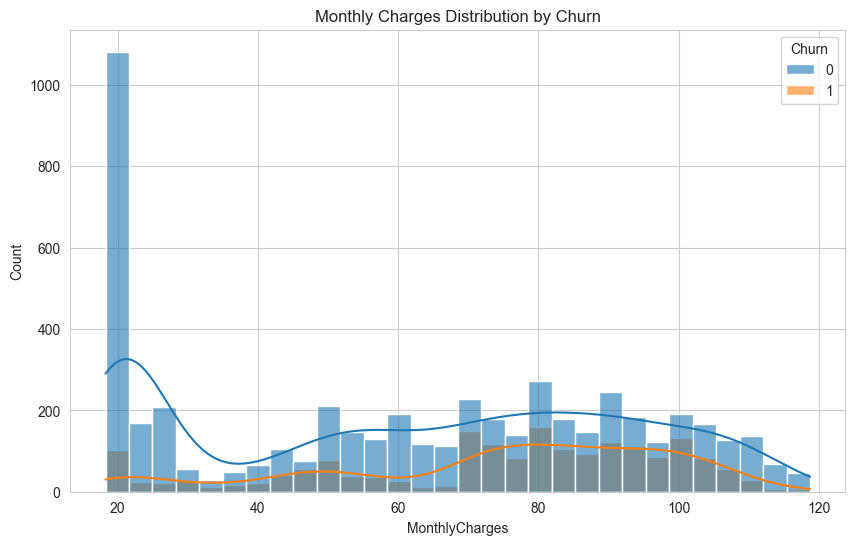

In [17]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, alpha=0.6)
plt.title('Monthly Charges Distribution by Churn')
plt.savefig('reports/images/churn_monthly_charges.png', bbox_inches='tight')
plt.show()

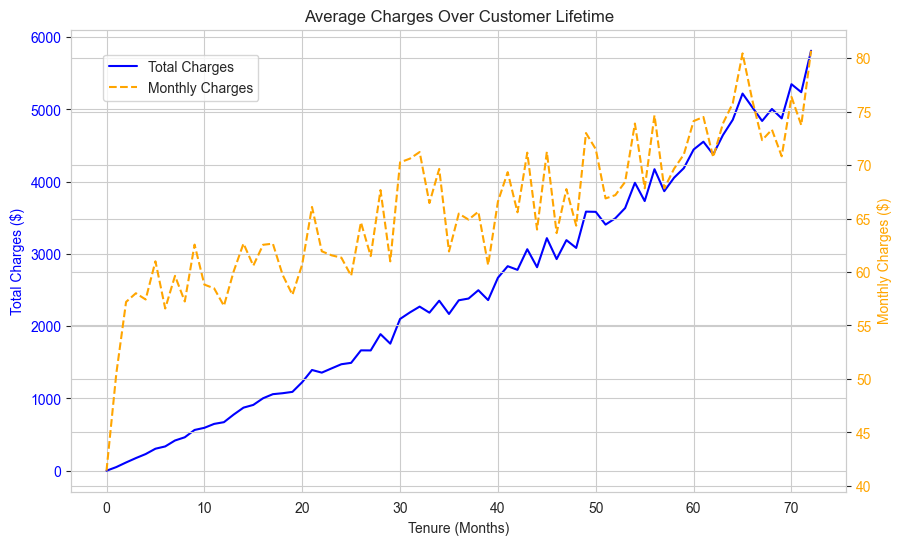

In [18]:
# Group by tenure and average TotalCharges
tenure_charge = df.groupby('tenure')[['MonthlyCharges', 'TotalCharges']].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(tenure_charge.index, tenure_charge['TotalCharges'], color='blue', label='Total Charges')
ax1.set_xlabel('Tenure (Months)')
ax1.set_ylabel('Total Charges ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(tenure_charge.index, tenure_charge['MonthlyCharges'], color='orange', linestyle='--', label='Monthly Charges')
ax2.set_ylabel('Monthly Charges ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Average Charges Over Customer Lifetime')
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
plt.savefig('reports/images/churn_trend.png', bbox_inches='tight')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3880\1405604221.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




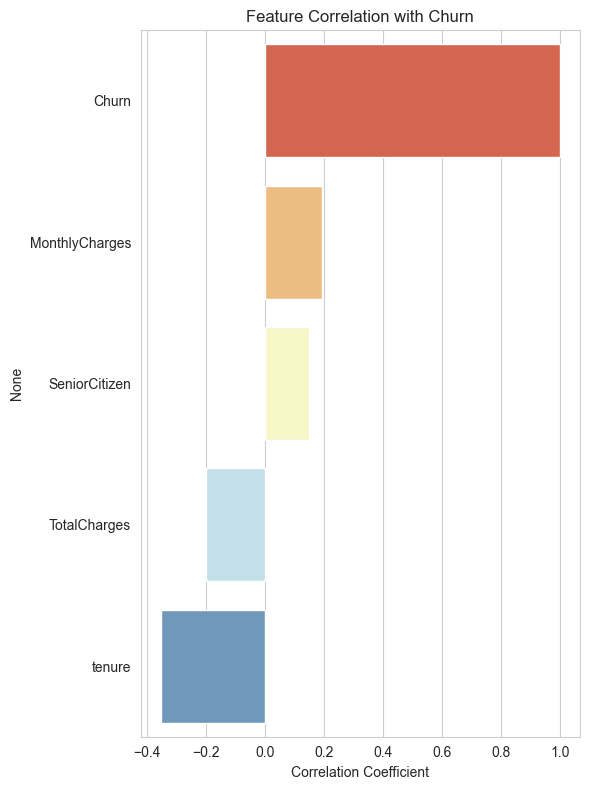

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation with Churn
corr_with_churn = numeric_df.corr()['Churn'].sort_values(ascending=False)

# Plot top/bottom 10
plt.figure(figsize=(6, 8))
sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, palette='RdYlBu')
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('reports/images/correlation_churn.png', bbox_inches='tight')
plt.show()